In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
traindata=pd.read_csv('train-digit.csv')

In [8]:
traindata.shape

(42000, 785)

In [9]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [10]:
traindata.isnull().sum().sum()

0

In [53]:
traindata.head(8)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\Abdul Wajed Farhat\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

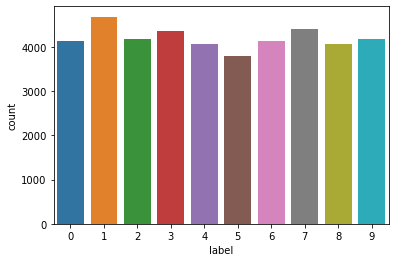

In [12]:
sns.countplot(traindata.label,data=traindata)

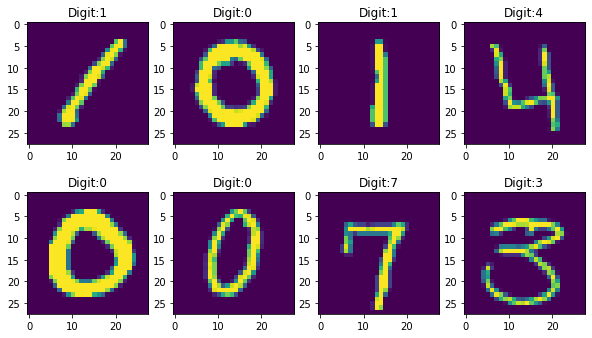

In [73]:
# Showing the graphical view of digits
plt.figure(figsize=(10,12))
for i in range (8):
    plt.subplot(4,4,i+1)
    plt.title(f'Digit:{traindata.iloc[i,0]}')
    plt.imshow(traindata.iloc[i,1:].to_numpy().reshape(28, 28))
    

In [74]:
# splitting the data into dependent and independent values
x=traindata.drop('label',axis=1)
y=traindata.label

In [42]:
x.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [76]:
x_train.shape, y_train.shape

((29400, 784), (29400,))

# KNN Nearest Neighbors

In [77]:
from sklearn.neighbors import KNeighborsClassifier
KNNmodel=KNeighborsClassifier(n_neighbors=5,)

In [78]:
KNNmodel.fit(x_train,y_train)
ypred_knn=KNNmodel.predict(x_test)

In [106]:
# import the metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print('correlation of predicted and observed values:\n\n',np.corrcoef(ypred_knn,y_test),'\n\n')
print('confusion matrix of the predicted values:\n\n',confusion_matrix(ypred_knn,y_test),'\n\n')
print('Accuracy score of predicted according to the observed values:\n\n',  accuracy_score(ypred_knn,y_test),'\n\n')

correlation of predicted and observed values:

 [[1.         0.96365912]
 [0.96365912 1.        ]] 


confusion matrix of the predicted values:

 [[1239    0    9    2    1    4    7    1    2    6]
 [   1 1400   17    7   15    2    1    7   15    2]
 [   2    3 1156    9    0    1    0    6    7    3]
 [   1    0    4 1265    0   19    0    1   21    7]
 [   0    0    2    0 1178    1    2    5    5   15]
 [   3    0    1   12    0 1065    4    0   31    5]
 [   3    1    1    1    1   15 1260    0    7    1]
 [   0    3   28   10    1    1    0 1250    3   12]
 [   1    0    1    5    0    4    0    0 1127    4]
 [   1    1    1    8   26    4    0   16    9 1222]] 


Accuracy score of predicted according to the observed values:

 0.9652380952380952 




# Decision Tree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier
treemodel=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [112]:
treemodel.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [113]:
ypred_tree=treemodel.predict(x_test)

In [114]:
print('correlation of predicted and observed values:\n\n',np.corrcoef(ypred_tree,y_test),'\n\n')
print('confusion matrix of the predicted values:\n\n',confusion_matrix(ypred_tree,y_test),'\n\n')
print('Accuracy score of predicted according to the observed values:\n\n',  accuracy_score(ypred_tree,y_test),'\n\n')

correlation of predicted and observed values:

 [[1.         0.56694439]
 [0.56694439 1.        ]] 


confusion matrix of the predicted values:

 [[ 877    0   29   11   15   34   23   23    6   15]
 [   4 1157  197   48   25   42   42   33   68   16]
 [   0    0    0    0    0    0    0    0    0    0]
 [ 127   49  162  734   40  325   26    9  629   41]
 [   4   66   27   25  846   34  265  103   26   88]
 [ 166   70  107  197   32  389  153   69  255   27]
 [  28   25  583   98   91   60  669    9   40   43]
 [  45   41  115  206  173  232   96 1040  203 1047]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]] 


Accuracy score of predicted according to the observed values:

 0.4533333333333333 




# Random Forest Classifier

In [115]:
from sklearn.ensemble import RandomForestClassifier
forestmodel=RandomForestClassifier(n_estimators=1000,n_jobs=1)

In [117]:
forestmodel.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=1)

In [118]:
ypred_forest=forestmodel.predict(x_test)

In [119]:
print('correlation of predicted and observed values:\n\n',np.corrcoef(ypred_forest,y_test),'\n\n')
print('confusion matrix of the predicted values:\n\n',confusion_matrix(ypred_forest,y_test),'\n\n')
print('Accuracy score of predicted according to the observed values:\n\n',  accuracy_score(ypred_forest,y_test),'\n\n')

correlation of predicted and observed values:

 [[1.         0.96145724]
 [0.96145724 1.        ]] 


confusion matrix of the predicted values:

 [[1227    0    4    1    1    2    1    3    5    8]
 [   0 1387    2    4    3    1    0    3    2    3]
 [   2    5 1170   14    0    2    2   13    7    4]
 [   0    4   11 1257    0   11    0    2   12   13]
 [   2    3   12    1 1181    0    4    3    7   16]
 [   3    1    0    9    0 1077    5    0    9    5]
 [   5    1    2    3    5   12 1257    0    4    0]
 [   0    4   13   11    1    2    0 1241    2   14]
 [  11    3    6    9    3    3    5    1 1169    9]
 [   1    0    0   10   28    6    0   20   10 1205]] 


Accuracy score of predicted according to the observed values:

 0.965952380952381 




# Support Vector Machine

In [120]:
from sklearn.svm import SVC
svmmodel=SVC(kernel='rbf')

In [121]:
svmmodel.fit(x_train,y_train)


SVC()

In [19]:
ypred_svm=svmmodel.predict(x_test)
from sklearn.metrics import accuracy_score
print('correlation of predicted and observed values:\n\n',np.corrcoef(ypred_svm,y_test),'\n\n')
print('confusion matrix of the predicted values:\n\n',confusion_matrix(ypred_svm,y_test),'\n\n')
print('Accuracy score of predicted according to the observed values:\n\n',  accuracy_score(ypred_svm,y_test),'\n\n')

0.9746825396825397

# Predict for the testing data

In [26]:
testdata=pd.read_csv('test-digit.csv')

In [27]:
testdata.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
testdata.isnull().sum().sum()

0

In [30]:
# Now fit the best model which is SVM with the whole data of training
svmmodel.fit(x,y)

SVC()

In [31]:
digsvm=svmmodel.predict(testdata)
pd.DataFrame(digsvm).to_csv('Dig-rec-svm.csv')